In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
data = pd.read_csv('SQLite.csv')

In [2]:
data.head(2)

,Mes,Convrs_SAL,Convrs_SQL,Convrs_OPP,Convrs_exito,Convrs_perdida
0,2019-12,25,0,0,0,0
1,2020-01,208,76,32,5,378


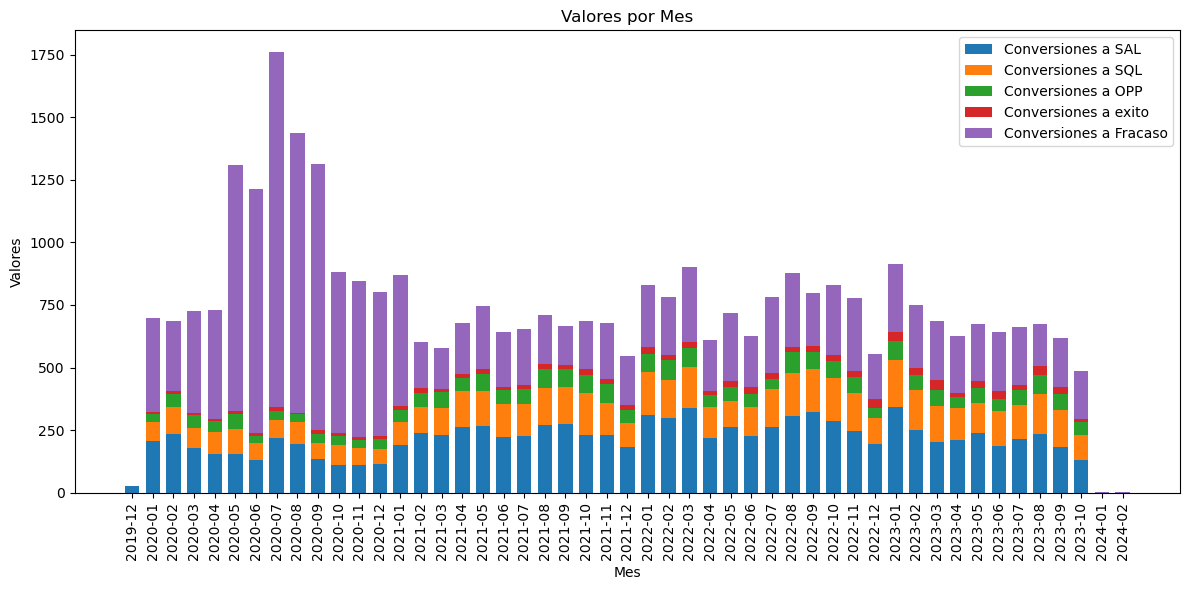

In [4]:
meses = data["Mes"]
convrs_sal = data["Convrs_SAL"]
convrs_sql = data["Convrs_SQL"]
convrs_opp = data["Convrs_OPP"]
convrs_exito = data["Convrs_exito"]
convrs_perdida = data["Convrs_perdida"]

plt.figure(figsize=(12, 6))
bar_width = 0.7
plt.bar(meses, convrs_sal, label="Conversiones a SAL", width=bar_width)
plt.bar(meses, convrs_sql, bottom=convrs_sal, label="Conversiones a SQL", width=bar_width)
plt.bar(meses, convrs_opp, bottom=convrs_sal + convrs_sql, label="Conversiones a OPP", width=bar_width)
plt.bar(meses, convrs_exito, bottom=convrs_sal + convrs_sql + convrs_opp, label="Conversiones a exito", width=bar_width)
plt.bar(meses, convrs_perdida, bottom=convrs_sal + convrs_sql + convrs_opp + convrs_exito, label="Conversiones a Fracaso", width=bar_width)

plt.xlabel("Mes")
plt.ylabel("Valores")
plt.title("Valores por Mes")
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
data['Pct_Diff_SAL_SQL'] = (data['Convrs_SQL'] / data['Convrs_SAL']) * 100
data['Pct_Diff_SQL_OPP'] = (data['Convrs_OPP'] / data['Convrs_SQL']) * 100

avg_pct_diff_SAL_SQL = data['Pct_Diff_SAL_SQL'].mean()
avg_pct_diff_SQL_OPP = data['Pct_Diff_SQL_OPP'].mean()

print(f"Proporción de SAL que se convierten a SQL: {avg_pct_diff_SAL_SQL:.2f}%")
print(f"Proporción de SQL que se convierten a OPP: {avg_pct_diff_SQL_OPP:.2f}%")

Proporción de SAL que se convierten a SQL: 54.53%
Proporción de SQL que se convierten a OPP: 47.12%


#### Conclusión:

El cuello de botella (identificado a través de la diferencia en la proporción de densidad de conversión) es la conversión a la etapa OPP, ya que la proporción de conversión a ésta estapa es la menor (47.12% < 54.53%). (Las conversiones a éxito y fracaso se excluyen del análisis dado que no son etapas dentro del proceso sino que constituyen el resultado del mismo).